In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

Matplotlib is building the font cache; this may take a moment.


In [71]:
#import data
dataset = pd.read_csv("Preprocessed_Dataset.csv",index_col="id")
featureNames = dataset.columns
dataset = np.array(dataset.values)
X = dataset[:,:-1]
Y = dataset[:,-1]
trainX,testX=X[:4000,:],X[4000:,:]
trainY,testY=Y[:4000],Y[4000:]

In [72]:
clf = RandomForestClassifier(max_depth=15,max_features="log2") #TODO: add paramters
clf.fit(trainX,trainY)
predY=clf.predict(testX)
predTrainY=clf.predict(trainX)
print("training set score:",accuracy_score(trainY,predTrainY))
print("testing set score:",accuracy_score(testY,predY))

training set score: 0.96775
testing set score: 0.7889688249400479


In [73]:
featureNames=np.array(featureNames)
featureNames = np.concatenate((np.array(["home_ownership"]),featureNames[4:-1]))
featureImportance = clf.feature_importances_
homeOwnershipTotal = featureImportance[0]+featureImportance[1]+featureImportance[2]+featureImportance[3]
newfeatureImportance = np.concatenate((np.array([homeOwnershipTotal]),featureImportance[4:]))

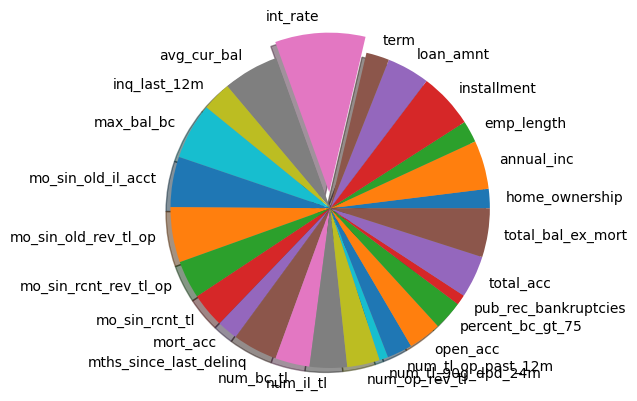

In [79]:
fig,axi = plt.subplots()
explode = [0,0,0,0,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
axi.pie(newfeatureImportance,labels=featureNames, explode=explode,shadow=True)
axi.axis('equal')
plt.show()